## Linear Regression Assignment (Bike Share)


### Reading and Understanding the Data

In [1]:
# Import all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import the data

bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the shape

bike_data.shape

(730, 16)

In [4]:
# Check data-info and other info regarding the null data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observation

- We see that the there are *no null datapoint* available in any columns.

- Total *16 features* are availble to study the data.




In [5]:
# Describe the numeric columns of the dataset

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Rename few columns name for better understanding and interpretation

bike_data.rename(columns={"yr":"year",
                          "mnth":"month",
                          "atemp":"abs-temp",
                          "hum":"humidity"}, inplace=True)
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,abs-temp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Drop the following columns
- `instant` : record index
- `dteday` : date
- `casual` and `registered`: Due to a feature column `cnt`, which is a sum of these two columns.

In [7]:
# Drop some columns

bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [8]:
# We, see that after dropping some columns, the remaining features are 12.

bike_data.shape

(730, 12)

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

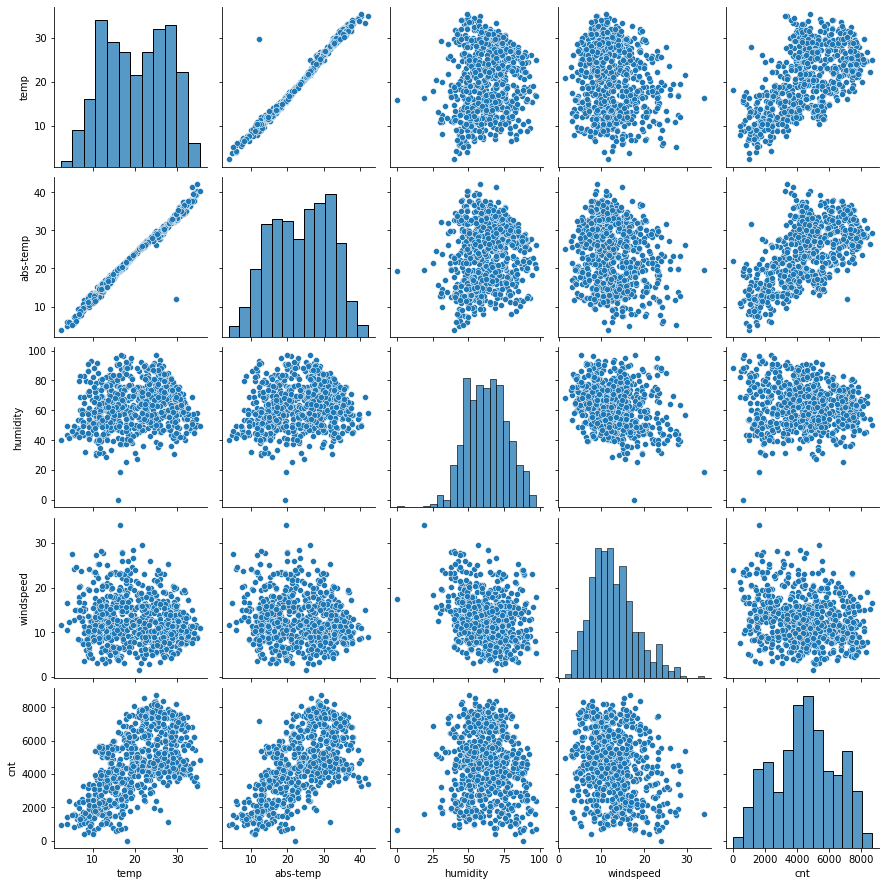

In [9]:
# Lets see pair plot to understand the behaviour of one feature w.r.t to other feature

sns.pairplot(data=bike_data,vars=['temp','abs-temp','humidity','windspeed','cnt'])
plt.show()

### Observation
- We see some very strong linear relation between `temp`, `abs-temp` and `cnt`.
- We see `temp` and `abs-temp` are very strongly correlated with each other.

In [10]:
# Lets map the data based on the data dictionaty in ordet to create dummy columns

bike_data['season'] = bike_data['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike_data['month'] = bike_data['month'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May",
                                             6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct",
                                             11:"Nov", 12:"Dec"})

bike_data['weekday'] = bike_data['weekday'].map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed",
                                                 4:"Thu", 5:"Fri", 6:"Sat"})

bike_data['weathersit'] = bike_data['weathersit'].map({1:"Clear", 2:"Mist", 
                                                       3:"Light Snow", 4:"Heavy Rain"})

bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,abs-temp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


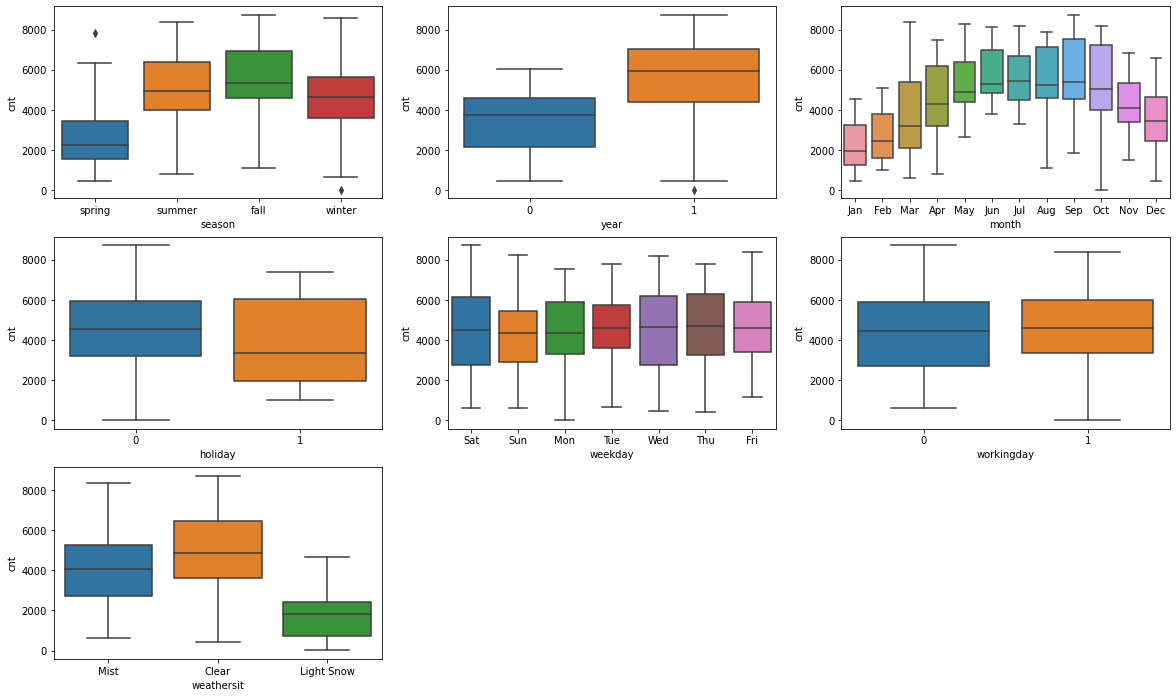

In [11]:
# Lets understand the behaviour of some categorical data

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

### Observation
- Fall `season` has the most bike share count, where as the Spring has minimum count.
- Number of count in `2019` are significantly (33.33%) more than that of 2018.
- Number of count in the `month` of Jun, July, Aug and Sep are the most.
- Count is more when the weather is clear.

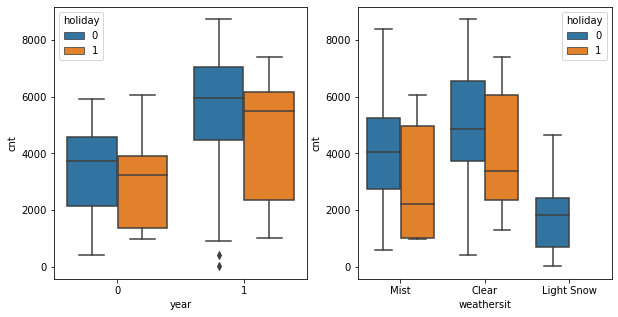

In [12]:
# Bivariate analysis

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'year', y = 'cnt', hue = 'holiday', data = bike_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = bike_data)
plt.show()

### Observation

- More people use the bike during the non-holiday time and clear weather.

In [13]:
# Define a function to get the bar plots

def get_bar_plot(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike_data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike_data, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

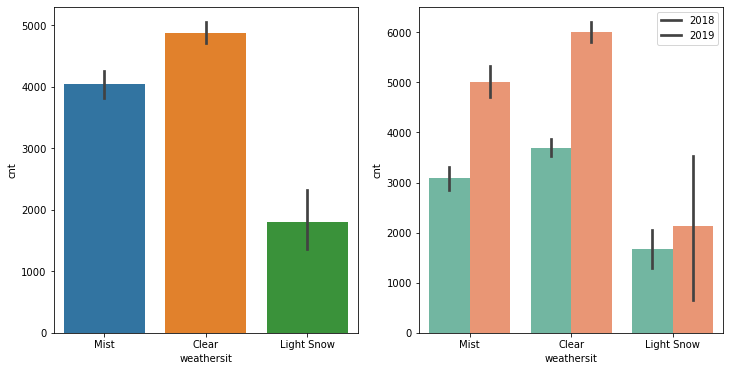

In [14]:
get_bar_plot('weathersit')

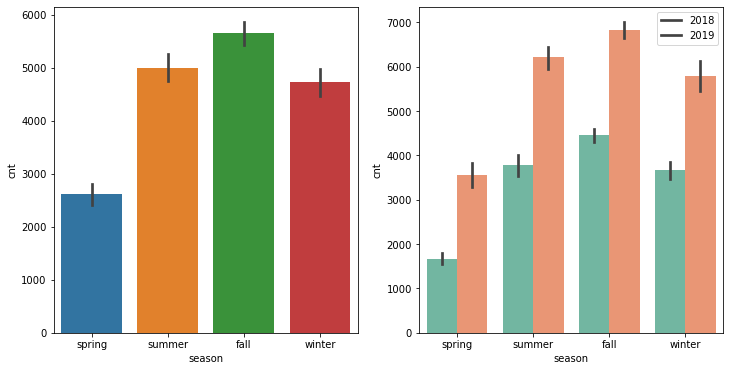

In [15]:
get_bar_plot('season')

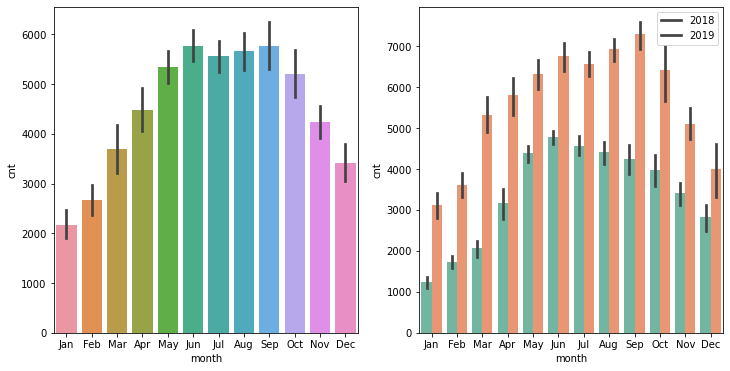

In [16]:
get_bar_plot('month')

### Observation

- More people use the bike during the non-holiday time and clear weather.
- Fall `season` has the most bike share count, where as the Spring has minimum count.
- Number of count in `2019` are significantly (33.33%) more than that of 2018.
- Number of count in the `month` of Jun, July, Aug and Sep are the most.
- Count is more when the weather is clear.

## Create dummy variable

In [17]:
# Create a function to get the dummy variable dataframe

def get_dummy_dataframe(column_name: list[str]):
    output = pd.DataFrame()
    for column in column_name:
        status = pd.get_dummies(bike_data[column], drop_first=True)
        output = pd.concat([output, status], axis=1)  # Concatenate the status DataFrame to the output
    return output

In [18]:
# Dummy dataframe from the below categorical columns

dummy_df = get_dummy_dataframe(column_name=['season', 'month', 'weekday', 'weathersit'])

In [19]:
# Dummy variable column name

dummy_df.columns

Index(['spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Light Snow', 'Mist'],
      dtype='object')

In [20]:
# Dummy variable dataframe

dummy_df

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Concatenate dummy dataframe with the original dataframe

bike_data = pd.concat([bike_data, dummy_df], axis=1)

In [22]:
# Concatinated dataframe

bike_data

,season,year,month,holiday,weekday,workingday,weathersit,temp,abs-temp,humidity,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,Mist,10.420847,11.33210,65.2917,...,0,0,0,0,0,1,0,0,0,1
726,spring,1,Dec,0,Fri,1,Mist,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,0,1
727,spring,1,Dec,0,Sat,0,Mist,10.386653,12.12000,75.2917,...,0,0,0,1,0,0,0,0,0,1
728,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,...,0,0,0,0,1,0,0,0,0,0


In [23]:
# Data info

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   abs-temp    730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [24]:
# Drop columns for which dummy df created

bike_data.drop(['season', 'month', 'weekday', 'weathersit'], 
               axis=1, inplace=True)

bike_data.head()

,year,holiday,workingday,temp,abs-temp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Final dataframe

bike_data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'abs-temp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
# Create a train test split

np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# Test data

df_test

,year,holiday,workingday,temp,abs-temp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,1,0,...,0,0,0,0,1,0,0,0,0,1
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,1,0,0,0,0,0,0,1,0,1


In [28]:
# Train data

df_train

,year,holiday,workingday,temp,abs-temp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
# Use scalling for some numeric feature 

scaler = MinMaxScaler()
num_var  = ['temp', 'abs-temp', 'humidity', 'windspeed', 'cnt']
df_train[num_var]  = scaler.fit_transform(df_train[num_var])
df_train

,year,holiday,workingday,temp,abs-temp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0.764151,0,1,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,0,0,1,0,0,0,0,0,1


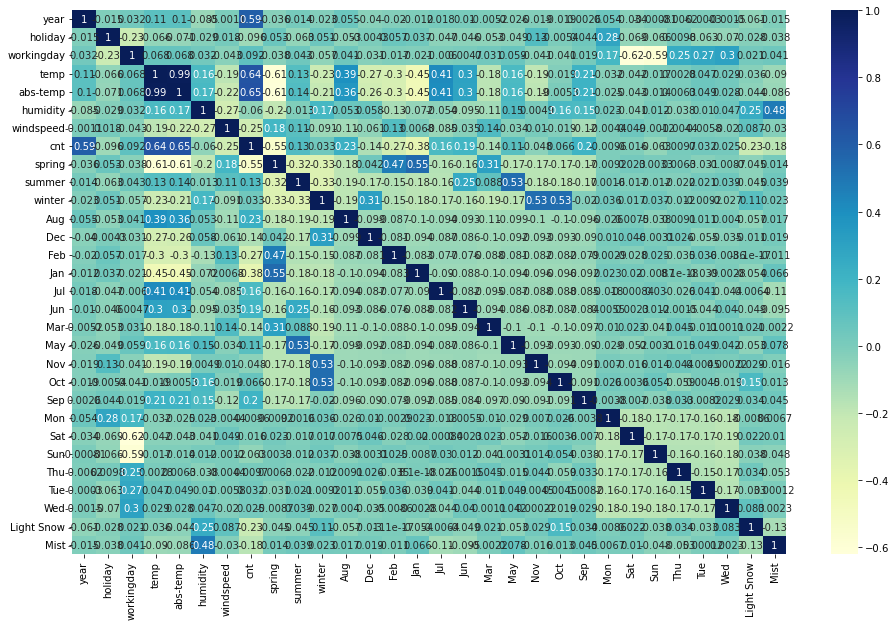

In [30]:
# Correlation plot for train dataset

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observation

-  We see that temp and abs_temp are highly correlated, therefore we will remove one of these feature.

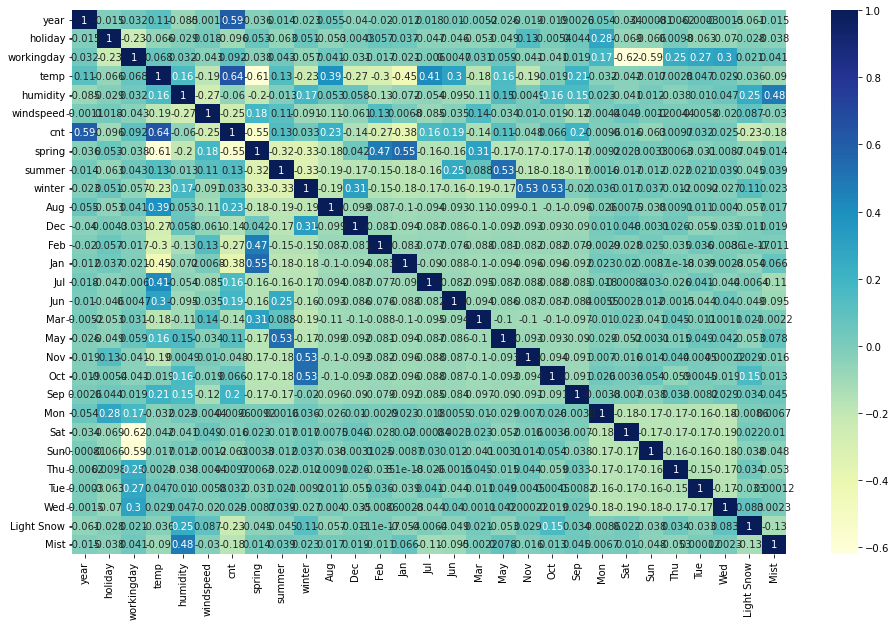

In [31]:
# Drop 'abs-temp' columns

df_train.drop(['abs-temp'], axis=1, inplace=True)
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


### Observation

-  Now, the strong correlation effect has been removed.

## Fit the model and predict using best model

In [32]:
# Select target feature and apply model
# Use RFE to select the best features

y_train = df_train.pop('cnt')
X_train = df_train

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe  =RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [33]:
# List of features with their names and ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 6),
 ('Tue', False, 4),
 ('Wed', False, 7),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [34]:
# Colums which supports the model

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist'],
      dtype='object')

In [35]:
# Column which does not support the model

X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed'], dtype='object')

In [36]:
# Build a model WITH required feature which supports the model

X_train_rfe_1 = X_train[col]

In [37]:
# Add constant to the model

import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_rfe_1)

In [38]:
# Fit the model

lm_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [39]:
# Print the model summary

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.59e-189
Time:                        16:53:37   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2487      0.030      8.252      0.0

In [40]:
# Write a function to create a VIF dataframe

def get_vif_dataframe(dataframe: pd.DataFrame):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [41]:
# Get VIF for 1st set if data

get_vif_dataframe(X_train_rfe_1)

,Features,VIF
2,workingday,60.93
16,Sat,14.59
17,Sun,13.91
6,spring,5.79
3,temp,4.88
8,winter,3.88
7,summer,3.49
1,holiday,3.43
11,Jan,2.38
4,humidity,1.97


In [42]:
# Perform the second iteration (As the feature 'holiday' is not significant), so will remove that

X_train_rfe_2 = X_train_rfe_1.drop(['holiday'], axis=1)

In [43]:
# Fit the model based on feature selecte in 2nd iteration

X_train_lm_2 = sm.add_constant(X_train_rfe_2)
lm_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.59e-189
Time:                        16:53:37   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2494      0.045      5.516      0.0

In [44]:
# VIF for 2nd set of data

get_vif_dataframe(X_train_rfe_2)

,Features,VIF
3,humidity,34.79
2,temp,22.48
1,workingday,19.10
5,spring,6.06
15,Sat,5.11
4,windspeed,5.06
16,Sun,4.89
7,winter,4.40
6,summer,3.71
10,Jan,2.42


In [45]:
# 3rd iteration 
# As the feature 'May' is not significant), so will remove that

X_train_rfe_3 = X_train_rfe_2.drop(['May'], axis=1)
X_train_lm_3 = sm.add_constant(X_train_rfe_3)
lm_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          3.55e-190
Time:                        16:53:37   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.044      5.335      0.0

In [46]:
# VIF dataframe 

get_vif_dataframe(X_train_rfe_3)

,Features,VIF
3,humidity,34.69
2,temp,22.29
1,workingday,18.92
5,spring,6.05
14,Sat,5.04
4,windspeed,4.99
15,Sun,4.85
7,winter,4.40
6,summer,3.09
10,Jan,2.42


In [47]:
# 4th iteration for the model fitting
# As the feature 'Feb' is not significant), so will remove that
X_train_rfe_4 = X_train_rfe_3.drop(['Feb'], axis=1)
X_train_lm_4 = sm.add_constant(X_train_rfe_4)
lm_4 = sm.OLS(y_train, X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          9.55e-191
Time:                        16:53:37   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2239      0.044      5.118      0.0

In [48]:
# VIF dataframe for 4th iteration

get_vif_dataframe(X_train_rfe_4)

,Features,VIF
3,humidity,34.24
2,temp,21.56
1,workingday,18.83
5,spring,5.06
13,Sat,5.03
4,windspeed,4.98
14,Sun,4.83
7,winter,4.40
6,summer,3.08
16,Mist,2.34


In [49]:
# 5th iteration for the model fitting
# As the feature 'Nov' is not significant), so will remove that

X_train_rfe_5 = X_train_rfe_4.drop(['Nov'], axis=1)
X_train_lm_5 = sm.add_constant(X_train_rfe_5)
lm_5 = sm.OLS(y_train, X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          9.27e-191
Time:                        16:53:38   Log-Likelihood:                 521.17
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1997      0.043      4.686      0.0

In [50]:
# VIF dataframe for 5th iteration

get_vif_dataframe(X_train_rfe_5)

,Features,VIF
3,humidity,33.73
2,temp,21.06
1,workingday,18.81
5,spring,5.04
12,Sat,5.03
4,windspeed,4.93
13,Sun,4.83
7,winter,3.79
6,summer,3.06
15,Mist,2.33


In [51]:
# 6th iteration for model fitting
# As the feature 'Dec' is not significant), so will remove that

X_train_rfe_6 = X_train_rfe_5.drop(['Dec'], axis=1)
X_train_lm_6 = sm.add_constant(X_train_rfe_6)
lm_6 = sm.OLS(y_train, X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.31e-191
Time:                        16:53:38   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.042      4.537      0.0

In [52]:
# VIF for 6th iteration

get_vif_dataframe(X_train_rfe_6)

,Features,VIF
3,humidity,32.81
2,temp,19.97
1,workingday,18.57
5,spring,5.04
11,Sat,4.95
4,windspeed,4.92
12,Sun,4.79
7,winter,3.76
6,summer,3.03
14,Mist,2.31


In [53]:
# 7th iteration for the model fitting
# As the feature 'May' is not significant due to high VIF), so will remove that

X_train_rfe_7 = X_train_rfe_6.drop(['humidity'], axis=1)
X_train_lm_7 = sm.add_constant(X_train_rfe_7)
lm_7 = sm.OLS(y_train, X_train_lm_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          7.33e-189
Time:                        16:53:38   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1175      0.039      3.012      0.0

In [54]:
# VIF dataframe for 7th iteration

get_vif_dataframe(X_train_rfe_7)

,Features,VIF
1,workingday,16.57
2,temp,13.12
3,windspeed,4.79
10,Sat,4.54
11,Sun,4.28
4,spring,4.22
6,winter,2.80
5,summer,2.75
0,year,2.08
7,Jan,1.65


In [55]:
# 8th iteration for the model fitting
# As the feature 'workingday' is not significant), so will remove that

X_train_rfe_8 = X_train_rfe_7.drop(['workingday'], axis=1)
X_train_lm_8 = sm.add_constant(X_train_rfe_8)
lm_8 = sm.OLS(y_train, X_train_lm_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.27e-186
Time:                        16:53:38   Log-Likelihood:                 503.07
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     496   BIC:                            -918.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2172      0.030      7.138      0.0

In [56]:
# VIF dataframe for 8th iteration

get_vif_dataframe(X_train_rfe_8)

,Features,VIF
1,temp,5.22
2,windspeed,4.64
3,spring,2.78
4,summer,2.24
0,year,2.07
5,winter,1.83
6,Jan,1.61
7,Jul,1.59
12,Mist,1.56
8,Sep,1.33


In [57]:
# Model fitting for the 9th iteration
# As the feature 'temp' is not significant), so will remove that

X_train_rfe_9 = X_train_rfe_8.drop(['temp'], axis=1)
X_train_lm_9 = sm.add_constant(X_train_rfe_9)
lm_9 = sm.OLS(y_train, X_train_lm_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     143.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.19e-152
Time:                        16:53:38   Log-Likelihood:                 419.63
No. Observations:                 510   AIC:                            -813.3
Df Residuals:                     497   BIC:                            -758.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5905      0.017     35.515      0.0

In [58]:
# VIF dataframe for 9th iteration

get_vif_dataframe(X_train_rfe_9)

,Features,VIF
1,windspeed,3.91
2,spring,2.78
3,summer,2.04
0,year,1.84
4,winter,1.79
5,Jan,1.60
11,Mist,1.52
6,Jul,1.22
8,Sat,1.21
9,Sun,1.20


In [59]:
# Model fitting for 10th iteration
# As the feature 'JUL' is not significant), so will remove that

X_train_rfe_10 = X_train_rfe_9.drop(['Jul'], axis=1)
X_train_lm_10 = sm.add_constant(X_train_rfe_10)
lm_10 = sm.OLS(y_train, X_train_lm_10).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.01e-153
Time:                        16:53:38   Log-Likelihood:                 419.54
No. Observations:                 510   AIC:                            -815.1
Df Residuals:                     498   BIC:                            -764.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5872      0.015     40.182      0.0

In [60]:
# VIF for the 10th iteration

get_vif_dataframe(X_train_rfe_10)

,Features,VIF
1,windspeed,3.60
2,spring,2.58
3,summer,1.87
0,year,1.78
4,winter,1.66
5,Jan,1.60
10,Mist,1.51
7,Sat,1.20
8,Sun,1.18
6,Sep,1.14


In [61]:
# Model fitting for 11th iteration
# As the feature 'Sat' is not significant), so will remove that

X_train_rfe_11 = X_train_rfe_10.drop(['Sat'], axis=1)
X_train_lm_11 = sm.add_constant(X_train_rfe_11)
lm_11 = sm.OLS(y_train, X_train_lm_11).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.14e-154
Time:                        16:53:38   Log-Likelihood:                 419.11
No. Observations:                 510   AIC:                            -816.2
Df Residuals:                     499   BIC:                            -769.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5891      0.014     40.705      0.0

In [62]:
# VIF for 11th iteration

get_vif_dataframe(X_train_rfe_11)

,Features,VIF
1,windspeed,3.52
2,spring,2.58
3,summer,1.86
0,year,1.78
4,winter,1.64
5,Jan,1.59
9,Mist,1.51
7,Sun,1.15
6,Sep,1.13
8,Light Snow,1.08


### Observation

- We see, model lm_11, is  having all the significant feature and having VIF <5. So, we will proceed with this model.
- R square and the adjusted R square values are: 0.775 and 0.771, which are pretty goood to show the variation.

In [63]:
# Get the prediction on X_train_lm_11

y_train_cnt = lm_11.predict(X_train_lm_11)
y_train_cnt

653    0.705298
576    0.787127
426    0.441624
728    0.405578
482    0.673354
         ...   
526    0.641783
578    0.801776
53     0.308135
350    0.345105
79     0.360795
Length: 510, dtype: float64

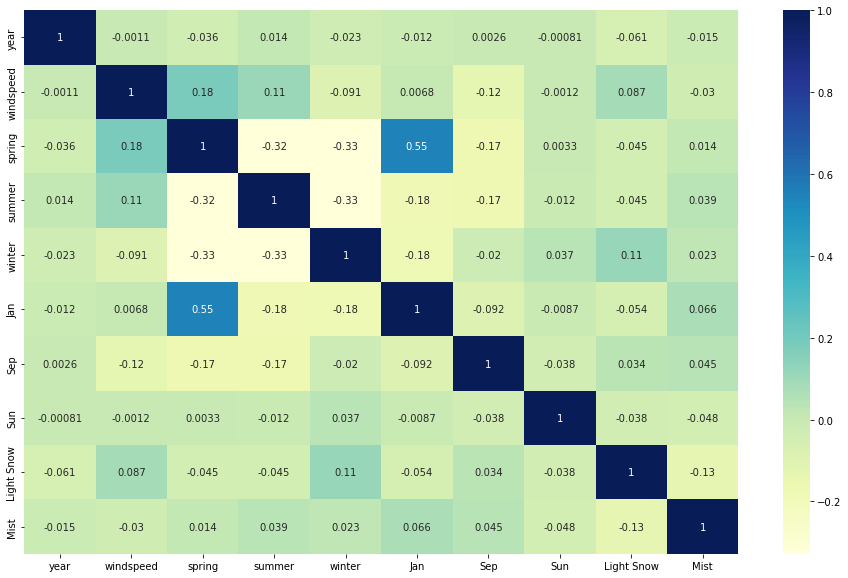

In [64]:
# Plot heatmap for final train data after feature removal

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe_11.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observation

- We see all the feature, which are relavent are having no multi-collinearity.

## Plot histogram for Error terms

Text(0.5, 0, 'Errors')

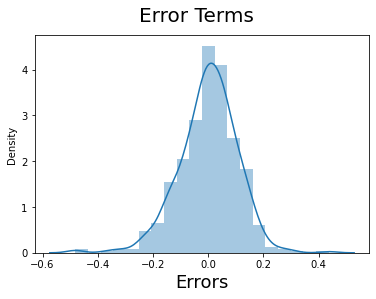

In [65]:
# Plot the histogram of the error terms
# We see, mean is almost zero and this shoud be the case.

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

## Prepare the test set based on the train set

In [66]:
# Select the colums to be transformed in the test set

num_var  = ['temp', 'abs-temp', 'humidity', 'windspeed', 'cnt']

df_test[num_var] = scaler.transform(df_test[num_var])

In [67]:
# Drop target and abs-temp from the test set

X_test = df_test.drop(['cnt', 'abs-temp'], axis=1)
y_test = df_test[['cnt']]

In [68]:
# Add a constant for test dataset

X_test_lm_11 = sm.add_constant(X_test)

In [69]:
# Select required columns for X_test_lm_11 WHICH are available in X_train_lm_11 

X_test_lm_11 = X_test_lm_11[X_train_lm_11.columns]
X_test_lm_11

,const,year,windspeed,spring,summer,winter,Jan,Sep,Sun,Light Snow,Mist
184,1.0,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.537414,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.287411,1,0,0,0,0,1,0,1
702,1.0,1,0.283397,0,0,1,0,0,0,0,0
127,1.0,0,0.069510,0,1,0,0,0,1,0,0
640,1.0,1,0.052115,0,0,1,0,0,0,0,1


## Get the prediction for test set

In [70]:
# we will use lm_11 model as this was the best model.
# Get the prediction

y_pred = lm_11.predict(X_test_lm_11)

In [71]:
# Predicted dataframe

y_pred

184    0.485778
535    0.767296
299    0.363545
221    0.524917
152    0.446750
         ...   
400    0.389174
702    0.708584
127    0.488750
640    0.664898
72     0.290748
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

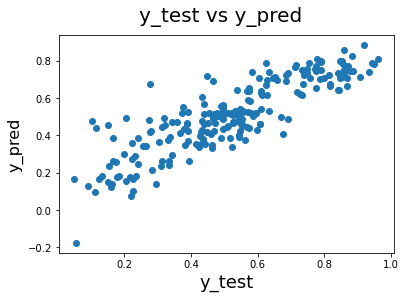

In [72]:
# Plot test and pred datapoints

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

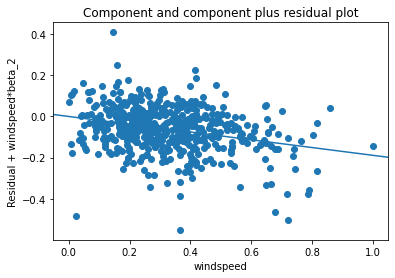

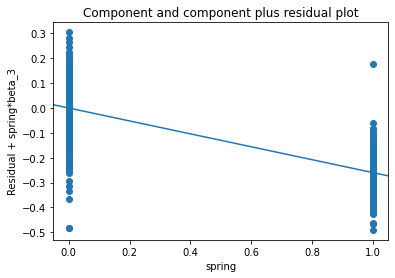

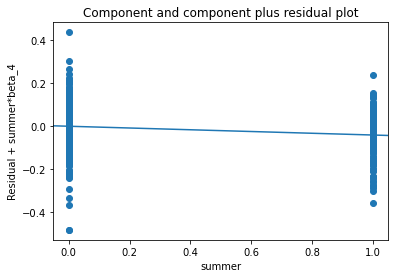

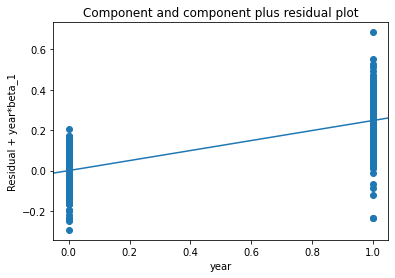

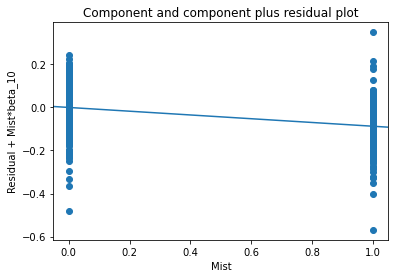

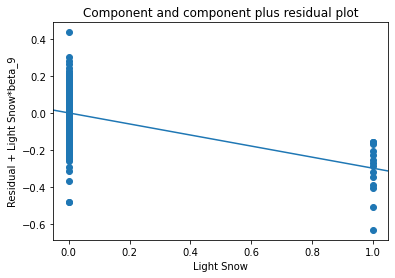

In [73]:
# Get the ccpr plots for some feature

sm.graphics.plot_ccpr(lm_11, 'windspeed')
plt.show()


sm.graphics.plot_ccpr(lm_11, 'spring')
plt.show()

sm.graphics.plot_ccpr(lm_11, 'summer')
plt.show()

sm.graphics.plot_ccpr(lm_11, 'year')
plt.show()

sm.graphics.plot_ccpr(lm_11, 'Mist')
plt.show()

sm.graphics.plot_ccpr(lm_11, 'Light Snow')
plt.show()

### Observation:
- All above plots shows linear relationships.

## Check for Homoscedasticity

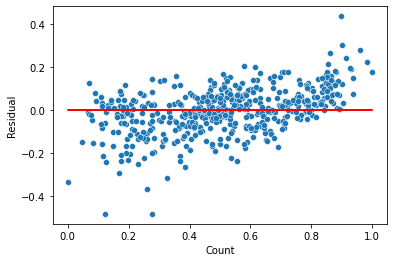

In [74]:
residual = y_train - y_train_cnt
sns.scatterplot(y_train, residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Observation
- We see that residul is almost zero and constant.

In [75]:
## Get some derived metrics for test and train dataset
# Get r2 score for test
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.7395825489781629


In [76]:
# Get r2 score for test
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_cnt)
print(r2_train)

0.7752016324072822


### Observation
- We see that the varivation is test and train dataset is almost uniform w.r.t prediction.

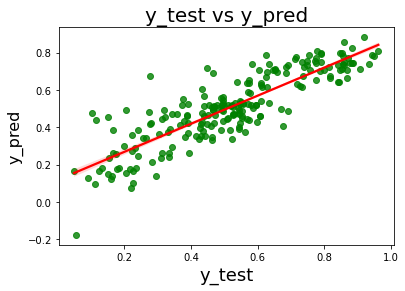

In [77]:
# Plot y_test vs y_pred with the best fit line

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [78]:
# Final model coefficients

print(lm_11.params)

const         0.589066
year          0.248063
windspeed    -0.188912
spring       -0.259890
summer       -0.040792
winter       -0.075008
Jan          -0.103274
Sep           0.069520
Sun          -0.046392
Light Snow   -0.299689
Mist         -0.087378
dtype: float64


## Final Model Eqaution


We can see that the equation of our best fitted line is:

$ cnt = 0.5891 + 0.2481  \times  year - 0.1889  \times  windspeed -0.2599  \times spring -0.0408 \times summer - 0.0750 \times winter - 0.1033 \times Jan + 0.0695 \times Sep - 0.0464 \times Sun - 0.2997 \times LightSnow -0.0874 \times Mist $